___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Improt Libraries & Data

In [8]:
try:
    import jupyter_black
    jupyter_black.load()
except ImportError:
    print("You can safely ignore this.")

You can safely ignore this.


In [9]:
import os

# Set tensorflow log level to ignore INFOs.
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "1"

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (10, 6)

sns.set_style("whitegrid")
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# Uncomment the following lines if you want to suppress warnings:
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

# Set it to None to display all rows in the dataframe:
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe:
pd.set_option("display.max_columns", None)

In [11]:
# Get tensorflow version
import tensorflow as tf

tf.__version__

'2.14.0'

In [12]:
# List cuda-capable gpu's that are attached to this session
if tf.config.list_physical_devices("GPU"):
    print("GPU support is enabled for this session.")
else:
    print("CPU will be used for this session.")

CPU will be used for this session.


In [13]:
df = pd.read_csv("Churn_Modelling.csv")

# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [14]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [16]:
df.shape

(10000, 14)

In [17]:
df.isnull().sum().any()

False

In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.000,5000.500,2886.896,1.000,2500.750,5000.500,7500.250,10000.000
CustomerId,10000.000,15690940.569,71936.186,15565701.000,15628528.250,15690738.000,15753233.750,15815690.000
CreditScore,10000.000,650.529,96.653,350.000,584.000,652.000,718.000,850.000
Age,10000.000,38.922,10.488,18.000,32.000,37.000,44.000,92.000
Tenure,10000.000,5.013,2.892,0.000,3.000,5.000,7.000,10.000
Balance,10000.000,76485.889,62397.405,0.000,0.000,97198.540,127644.240,250898.090
NumOfProducts,10000.000,1.530,0.582,1.000,1.000,1.000,2.000,4.000
HasCrCard,10000.000,0.706,0.456,0.000,0.000,1.000,1.000,1.000
IsActiveMember,10000.000,0.515,0.500,0.000,0.000,1.000,1.000,1.000
EstimatedSalary,10000.000,100090.240,57510.493,11.580,51002.110,100193.915,149388.247,199992.480


In [19]:
df = df.drop(["CustomerId", "RowNumber", "Surname"], axis=1)
df.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0
5,645,Spain,Male,44,8,113755.780,2,1,0,149756.710,1
6,822,France,Male,50,7,0.000,2,1,1,10062.800,0
7,376,Germany,Female,29,4,115046.740,4,1,0,119346.880,1
8,501,France,Male,44,4,142051.070,2,0,1,74940.500,0
9,684,France,Male,27,2,134603.880,1,1,1,71725.730,0


<Axes: xlabel='Exited', ylabel='count'>

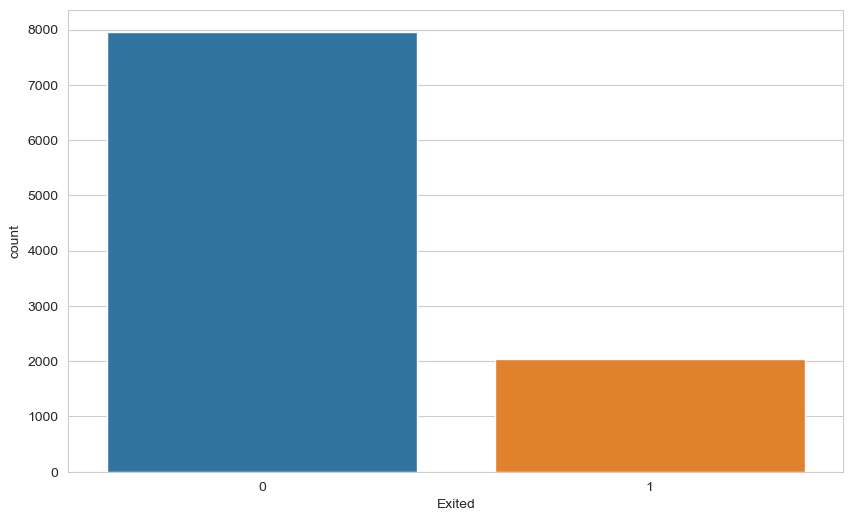

In [20]:
sns.countplot(x=df["Exited"])

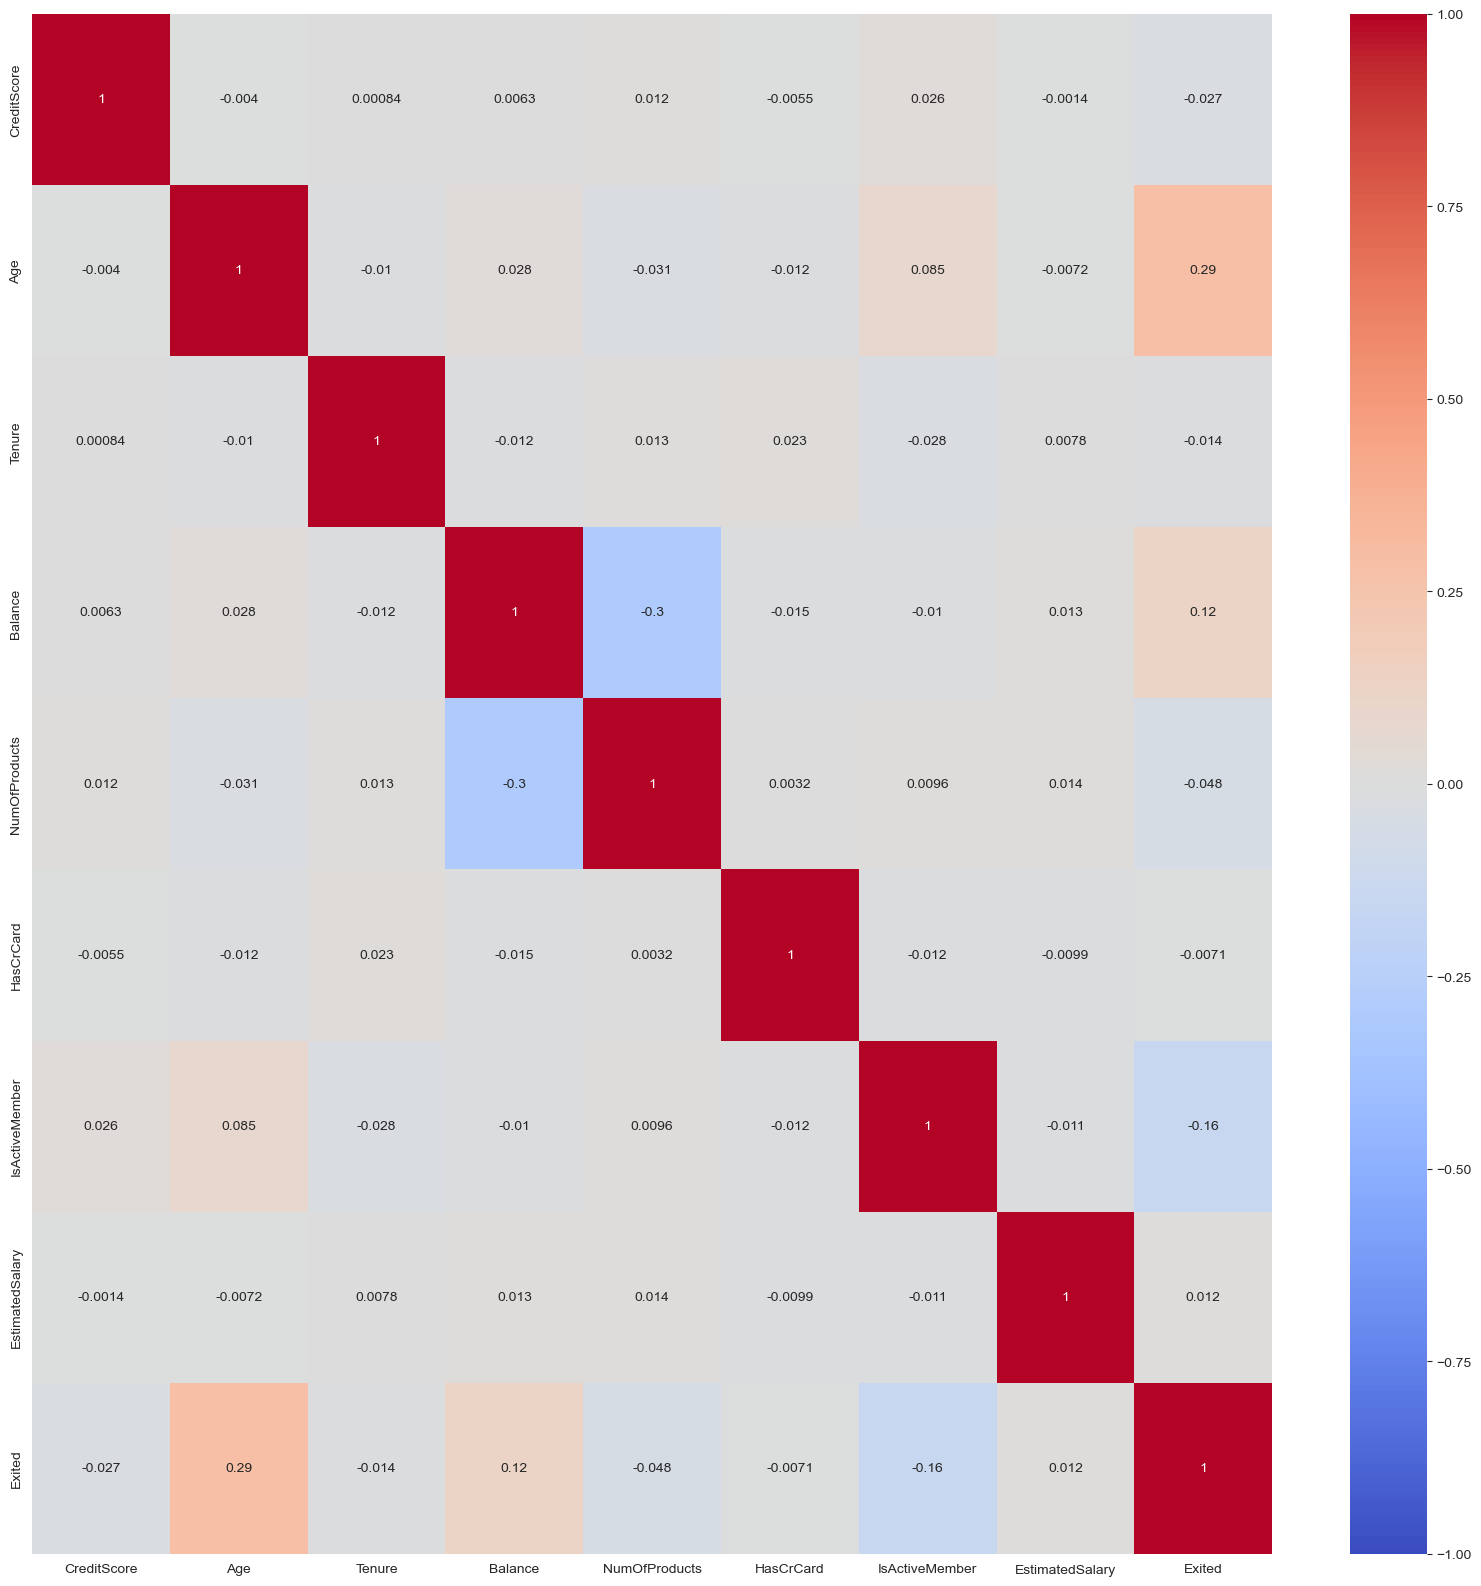

In [21]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, cmap="coolwarm")
plt.show()

In [22]:
df["Geography"].dtype

dtype('O')

In [23]:
df["Geography"].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [24]:
df["Geography"] = df.Geography.map(
    {
        "France": 0,
        "Germany": 1,
        "Spain": 2,
    
    }
)
df["Geography"]

0       0
1       2
2       0
3       0
4       2
       ..
9995    0
9996    0
9997    0
9998    1
9999    0
Name: Geography, Length: 10000, dtype: int64

In [25]:
df["Gender"] = df.Gender.map(
    {
        "Female": 0,
        "Male": 1,
    
    }
)
df["Gender"]

0       0
1       0
2       0
3       0
4       0
       ..
9995    1
9996    1
9997    0
9998    1
9999    0
Name: Gender, Length: 10000, dtype: int64

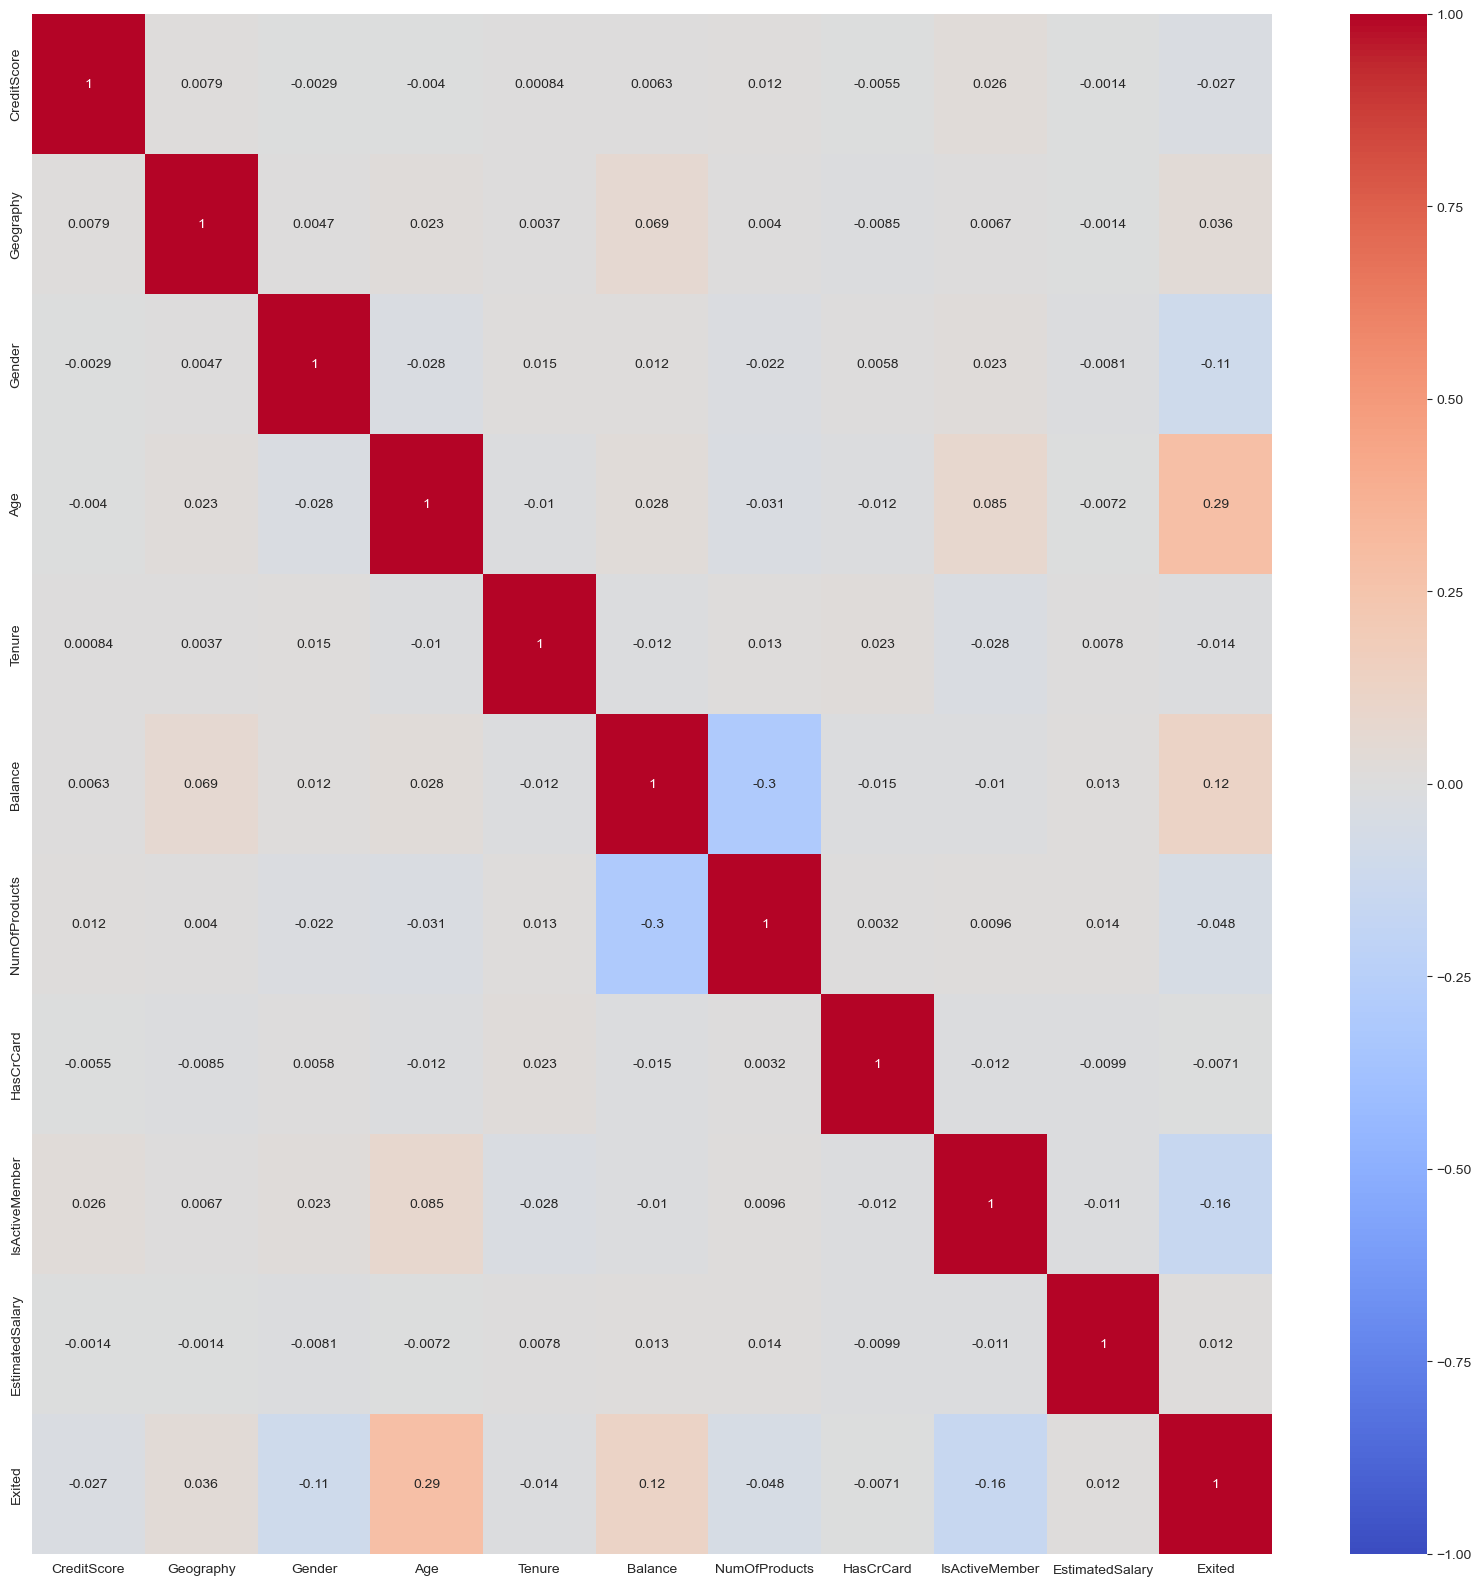

In [26]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, cmap="coolwarm")
plt.show()


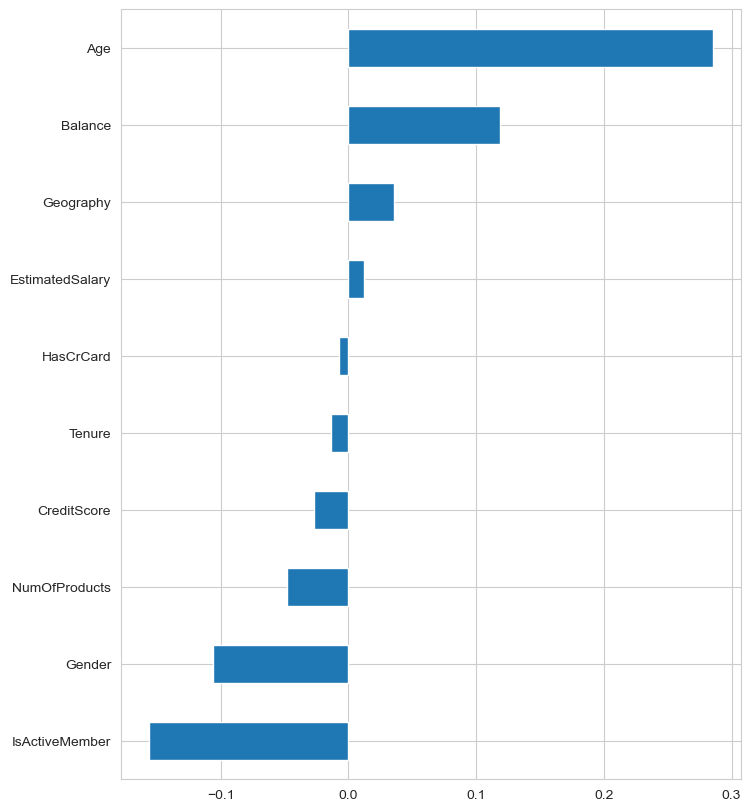

In [27]:
plt.figure(figsize=(8, 10))
(df.corr()["Exited"].sort_values().drop("Exited").plot(kind="barh"))
plt.show()

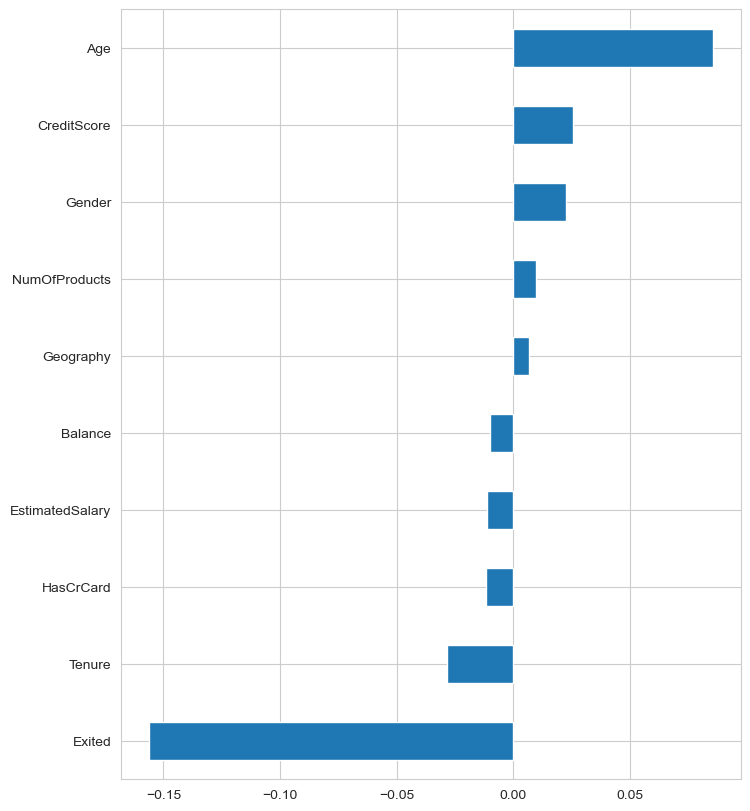

In [28]:
plt.figure(figsize=(8, 10))
(df.corr()["IsActiveMember"].sort_values().drop("IsActiveMember").plot(kind="barh"))
plt.show()

# Preprocessing of Data
- Train | Test Split, Scalling

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [30]:
X = df.drop("Exited", axis=1)
y = df["Exited"]

In [31]:
seed = 42
import os
import random

os.environ["TF_DETERMINISTIC_OPS"] = "1"
tf.keras.utils.set_random_seed(seed)
os.environ['PYTHONHASHSEED']=str(seed)
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)


In [32]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.10, random_state=seed
)
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, stratify=y, test_size=0.10, random_state=seed
)

In [33]:
scaler = MinMaxScaler()

In [34]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modelling & Model Performance

## without class_weigth

### Create The Model

In [35]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import RocCurveDisplay, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

In [36]:
X_train.shape

(9000, 10)

In [37]:
X_test.shape

(1000, 10)

In [38]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(32, activation="relu", input_dim=X_train.shape[1]))
model.add(Dense(18, activation="relu"))
model.add(Dense(6, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [39]:
model.fit(
    x=X_train, y=y_train, validation_split=0.1, batch_size=32, epochs=1000, verbose=1
)

Epoch 1/1000


254/254 [==============================] - 2s 3ms/step - loss: 0.5956 - accuracy: 0.7591 - val_loss: 0.4833 - val_accuracy: 0.7989
Epoch 2/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.4799 - accuracy: 0.7960 - val_loss: 0.4596 - val_accuracy: 0.7989
Epoch 3/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.4559 - accuracy: 0.8048 - val_loss: 0.4214 - val_accuracy: 0.8367
Epoch 4/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.4360 - accuracy: 0.8177 - val_loss: 0.4039 - val_accuracy: 0.8478
Epoch 5/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.4231 - accuracy: 0.8247 - val_loss: 0.3881 - val_accuracy: 0.8544
Epoch 6/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.4075 - accuracy: 0.8327 - val_loss: 0.3591 - val_accuracy: 0.8678
Epoch 7/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.3864 - accuracy: 0.8427 - val_loss: 0.3415 - val_accuracy: 0.8700
Epoch

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [40]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                352       
                                                                 
 dense_1 (Dense)             (None, 18)                594       
                                                                 
 dense_2 (Dense)             (None, 6)                 114       
                                                                 
 dense_3 (Dense)             (None, 1)                 7         
                                                                 
Total params: 1067 (4.17 KB)
Trainable params: 1067 (4.17 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [41]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.596,0.759,0.483,0.799
1,0.480,0.796,0.460,0.799
2,0.456,0.805,0.421,0.837
3,0.436,0.818,0.404,0.848
4,0.423,0.825,0.388,0.854


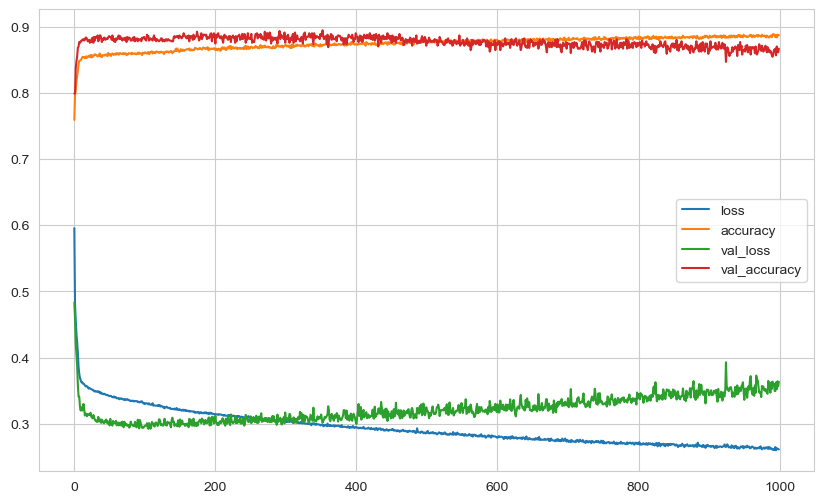

In [42]:
loss_df.plot()
plt.show()

In [43]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("accuracy: ", accuracy)

loss:  0.5281175374984741
accuracy:  0.8360000252723694


In [44]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[752  44]
 [120  84]]
              precision    recall  f1-score   support

           0       0.86      0.94      0.90       796
           1       0.66      0.41      0.51       204

    accuracy                           0.84      1000
   macro avg       0.76      0.68      0.70      1000
weighted avg       0.82      0.84      0.82      1000



32/32 [==============================] - 0s 1ms/step


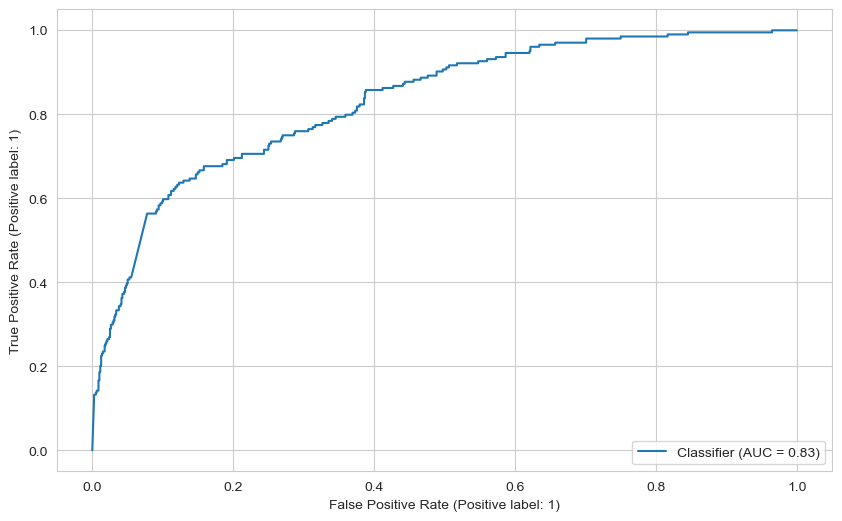

In [45]:
y_pred_proba = model.predict(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred_proba)

In [46]:
roc_auc_score(y_test, y_pred_proba)

0.8308207705192631

## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

### Create The Model

In [126]:
model = Sequential()

model.add(Dense(32, activation="relu", input_dim=X_train.shape[1]))
model.add(Dense(18, activation="relu"))
model.add(Dense(6, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [128]:
def objective(trial):
    model = create_model(trial)
    w0 = trial.suggest_loguniform("w0", 0.01, 5)
    w1 = trial.suggest_loguniform("w1", 0.01, 5)
    model.fit(
    x=X_train, y=y_train, validation_split=0.1, batch_size=32, epochs=1000, class_weight={0: w0, 1: w1}, verbose=1
)
    score = model.evaluate(X_test, y_test, verbose=0)[1]
    return score


### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [129]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_53 (Dense)            (None, 32)                352       
                                                                 
 dense_54 (Dense)            (None, 18)                594       
                                                                 
 dense_55 (Dense)            (None, 6)                 114       
                                                                 
 dense_56 (Dense)            (None, 1)                 7         
                                                                 
Total params: 1067 (4.17 KB)
Trainable params: 1067 (4.17 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


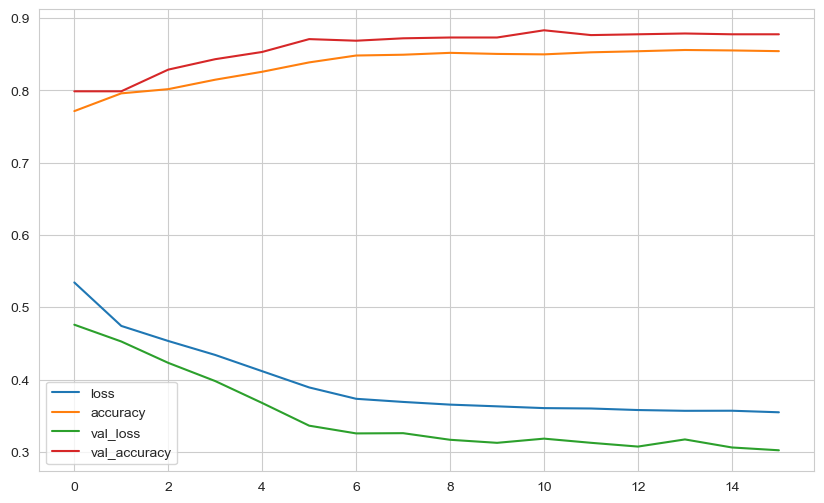

In [131]:
loss_df.plot()
plt.show()

In [132]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("accuracy: ", accuracy)

loss:  0.7453581094741821
accuracy:  0.20600000023841858


In [133]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 3ms/step
[[  6 790]
 [  4 200]]
              precision    recall  f1-score   support

           0       0.60      0.01      0.01       796
           1       0.20      0.98      0.34       204

    accuracy                           0.21      1000
   macro avg       0.40      0.49      0.17      1000
weighted avg       0.52      0.21      0.08      1000



32/32 [==============================] - 0s 2ms/step


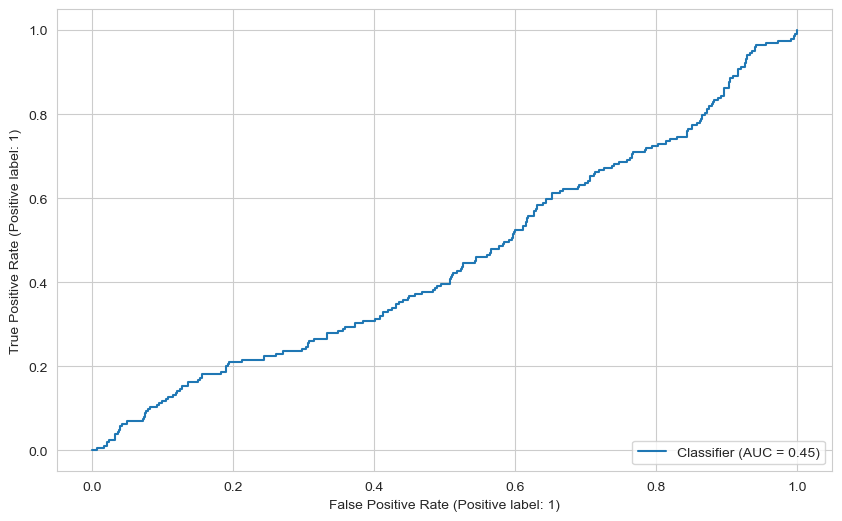

In [134]:
y_pred_proba = model.predict(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred_proba)

In [135]:
roc_auc_score(y_test, y_pred_proba)

0.4543489506355306

## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method

### Increase The Learning Rate and Observe The Results

In [47]:
from tensorflow.keras.optimizers import Adam

In [48]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(32, activation="relu", input_dim=X_train.shape[1]))
model.add(Dense(18, activation="relu"))
model.add(Dense(6, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(learning_rate=0.005)
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["accuracy"])

In [49]:
model.fit(
    x=X_train, y=y_train, validation_split=0.1, batch_size=32, epochs=1000, verbose=1
)

Epoch 1/1000


254/254 [==============================] - 1s 2ms/step - loss: 0.4964 - accuracy: 0.7864 - val_loss: 0.4258 - val_accuracy: 0.8122
Epoch 2/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.4122 - accuracy: 0.8260 - val_loss: 0.3468 - val_accuracy: 0.8700
Epoch 3/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.3781 - accuracy: 0.8460 - val_loss: 0.3235 - val_accuracy: 0.8822
Epoch 4/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.3719 - accuracy: 0.8515 - val_loss: 0.3185 - val_accuracy: 0.8744
Epoch 5/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.3679 - accuracy: 0.8504 - val_loss: 0.3261 - val_accuracy: 0.8756
Epoch 6/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.3674 - accuracy: 0.8505 - val_loss: 0.3178 - val_accuracy: 0.8767
Epoch 7/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.3623 - accuracy: 0.8505 - val_loss: 0.3131 - val_accuracy: 0.8800
Epoch

<Axes: >

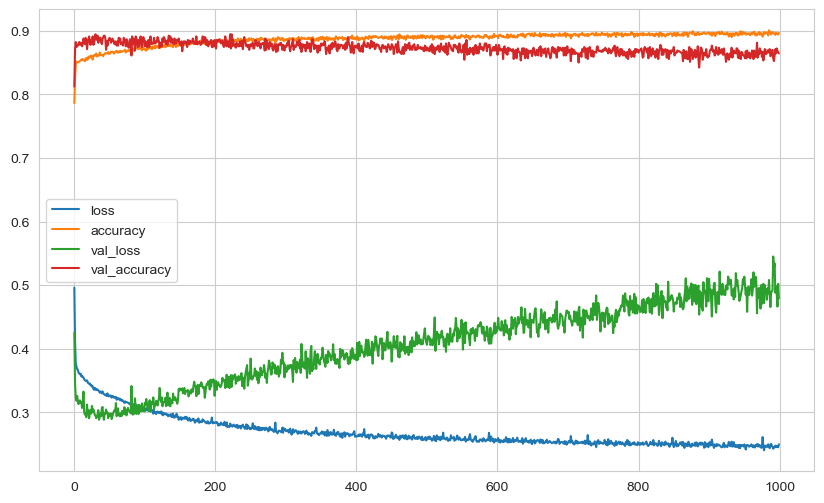

In [50]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [51]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("accuracy: ", accuracy)

loss:  0.6745666265487671
accuracy:  0.8320000171661377


In [52]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[731  65]
 [103 101]]
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       796
           1       0.61      0.50      0.55       204

    accuracy                           0.83      1000
   macro avg       0.74      0.71      0.72      1000
weighted avg       0.82      0.83      0.83      1000



32/32 [==============================] - 0s 1ms/step


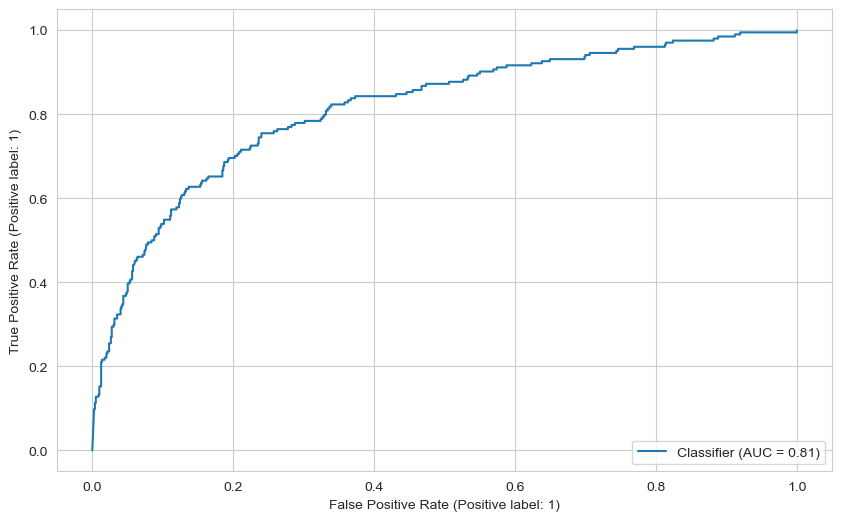

In [53]:
y_pred_proba = model.predict(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred_proba)

### Add Dropout Layer

In [54]:
from tensorflow.keras.layers import Dropout

In [55]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(32, activation="relu", input_dim=X_train.shape[1]))
model.add(Dropout(0.5))

model.add(Dense(18, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(1, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(1, activation="sigmoid"))

opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["accuracy"])

In [56]:
model.fit(
    x=X_train, y=y_train, validation_split=0.1, batch_size=32, epochs=1000, verbose=1
)

Epoch 1/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.6140 - accuracy: 0.7960 - val_loss: 0.5333 - val_accuracy: 0.7989
Epoch 2/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.5710 - accuracy: 0.7960 - val_loss: 0.5307 - val_accuracy: 0.7989
Epoch 3/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.5425 - accuracy: 0.7960 - val_loss: 0.5095 - val_accuracy: 0.7989
Epoch 4/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.5291 - accuracy: 0.7960 - val_loss: 0.5016 - val_accuracy: 0.7989
Epoch 5/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.5164 - accuracy: 0.7960 - val_loss: 0.4922 - val_accuracy: 0.7989
Epoch 6/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.5111 - accuracy: 0.7960 - val_loss: 0.4900 - val_accuracy: 0.7989
Epoch 7/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.5067 - accuracy: 0.7960 - val_loss: 0.4887 - val_accuracy:

<Axes: >

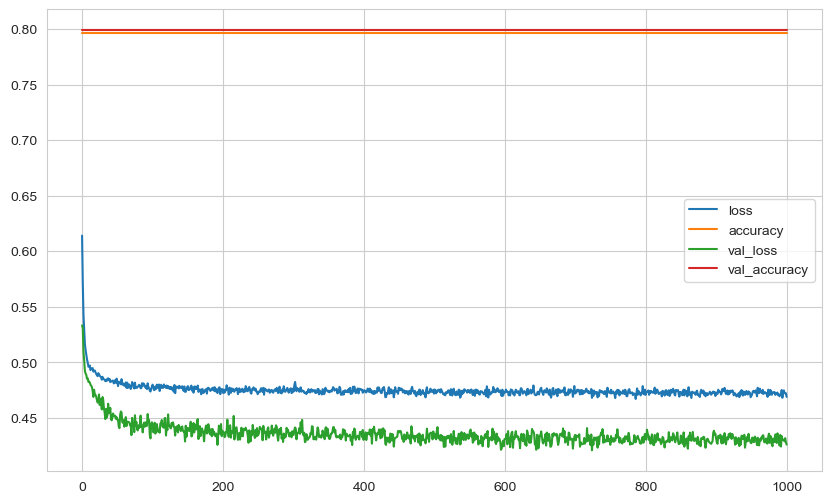

In [57]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [58]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("accuracy: ", accuracy)

loss:  0.4352804124355316
accuracy:  0.7960000038146973


In [59]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[796   0]
 [204   0]]
              precision    recall  f1-score   support

           0       0.80      1.00      0.89       796
           1       0.00      0.00      0.00       204

    accuracy                           0.80      1000
   macro avg       0.40      0.50      0.44      1000
weighted avg       0.63      0.80      0.71      1000



32/32 [==============================] - 0s 1ms/step


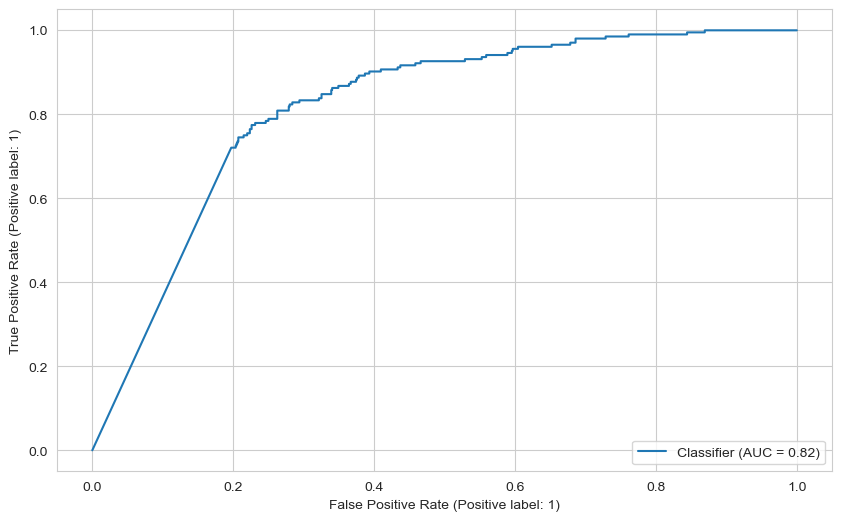

In [60]:
y_pred_proba = model.predict(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred_proba)

### Add Early Stop

In [61]:
from tensorflow.keras.callbacks import EarlyStopping

#### Monitor the "val_loss" as metric

In [62]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(32, activation="relu", input_dim=X_train.shape[1]))
model.add(Dense(18, activation="relu"))
model.add(Dense(6, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [63]:
early_stop = EarlyStopping(
    monitor="val_loss", mode="min", verbose=1, patience=15, restore_best_weights=True
)

In [64]:
model.fit(
    x=X_train,
    y=y_train,
    validation_split=0.1,
    batch_size=32,
    epochs=1000,
    verbose=1,
    callbacks=[early_stop],
)

Epoch 1/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.4935 - accuracy: 0.7960 - val_loss: 0.4655 - val_accuracy: 0.7989
Epoch 2/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.4644 - accuracy: 0.7969 - val_loss: 0.4397 - val_accuracy: 0.8078
Epoch 3/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.4433 - accuracy: 0.8106 - val_loss: 0.4124 - val_accuracy: 0.8278
Epoch 4/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.4240 - accuracy: 0.8201 - val_loss: 0.3848 - val_accuracy: 0.8489
Epoch 5/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.4021 - accuracy: 0.8275 - val_loss: 0.3546 - val_accuracy: 0.8622
Epoch 6/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.3820 - accuracy: 0.8401 - val_loss: 0.3306 - val_accuracy: 0.8733
Epoch 7/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.3697 - accuracy: 0.8458 - val_loss: 0.3212 - val_accuracy:

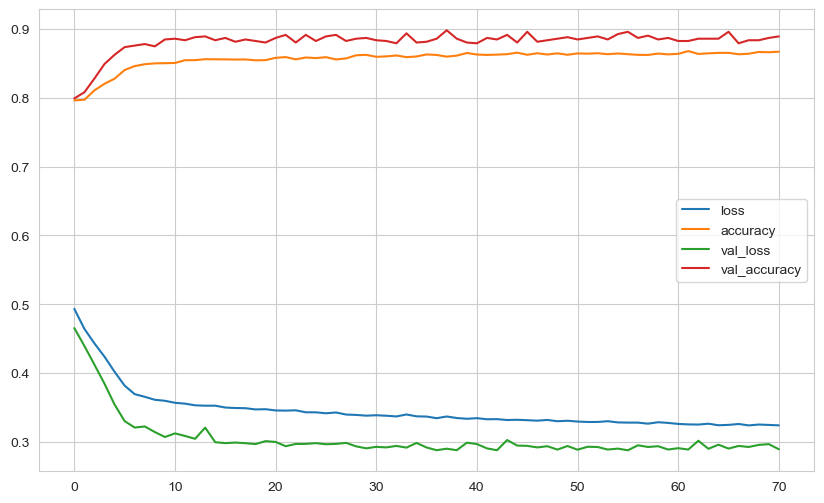

In [65]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()
plt.show()

In [66]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("accuracy: ", accuracy)

loss:  0.341450035572052
accuracy:  0.8619999885559082


In [67]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[766  30]
 [108  96]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       796
           1       0.76      0.47      0.58       204

    accuracy                           0.86      1000
   macro avg       0.82      0.72      0.75      1000
weighted avg       0.85      0.86      0.85      1000



32/32 [==============================] - 0s 2ms/step


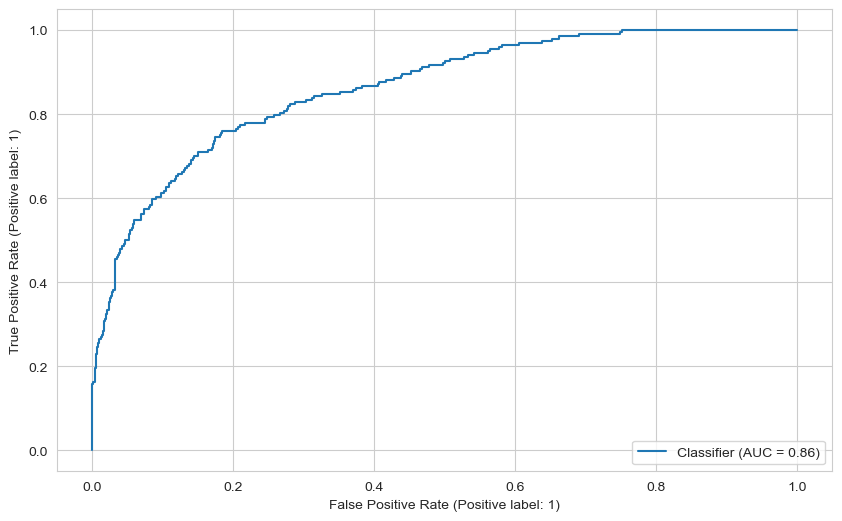

In [68]:
y_pred_proba = model.predict(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred_proba)

#### Monitor the "val_recall" as metric

In [69]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(32, activation="relu", input_dim=X_train.shape[1]))
model.add(Dense(18, activation="relu"))
model.add(Dense(6, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [70]:
early_stop = EarlyStopping(
    monitor="val_accuracy", mode="min", verbose=1, patience=15, restore_best_weights=True
)

In [71]:
model.fit(
    x=X_train,
    y=y_train,
    validation_split=0.1,
    batch_size=32,
    epochs=1000,
    verbose=1,
    callbacks=[early_stop],
)

Epoch 1/1000


254/254 [==============================] - 1s 3ms/step - loss: 0.5343 - accuracy: 0.7715 - val_loss: 0.4759 - val_accuracy: 0.7989
Epoch 2/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.4742 - accuracy: 0.7960 - val_loss: 0.4526 - val_accuracy: 0.7989
Epoch 3/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.4533 - accuracy: 0.8019 - val_loss: 0.4231 - val_accuracy: 0.8289
Epoch 4/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.4340 - accuracy: 0.8149 - val_loss: 0.3979 - val_accuracy: 0.8433
Epoch 5/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.4115 - accuracy: 0.8259 - val_loss: 0.3675 - val_accuracy: 0.8533
Epoch 6/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.3891 - accuracy: 0.8389 - val_loss: 0.3361 - val_accuracy: 0.8711
Epoch 7/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.3733 - accuracy: 0.8484 - val_loss: 0.3254 - val_accuracy: 0.8689
Epoch

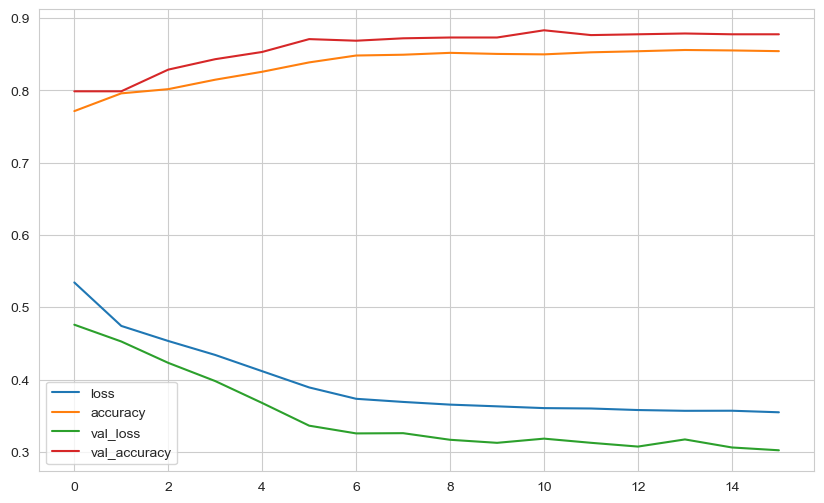

In [72]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()
plt.show()

In [73]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("accuracy: ", accuracy)

loss:  0.4807423949241638
accuracy:  0.7960000038146973


In [74]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[796   0]
 [204   0]]
              precision    recall  f1-score   support

           0       0.80      1.00      0.89       796
           1       0.00      0.00      0.00       204

    accuracy                           0.80      1000
   macro avg       0.40      0.50      0.44      1000
weighted avg       0.63      0.80      0.71      1000



32/32 [==============================] - 0s 1ms/step


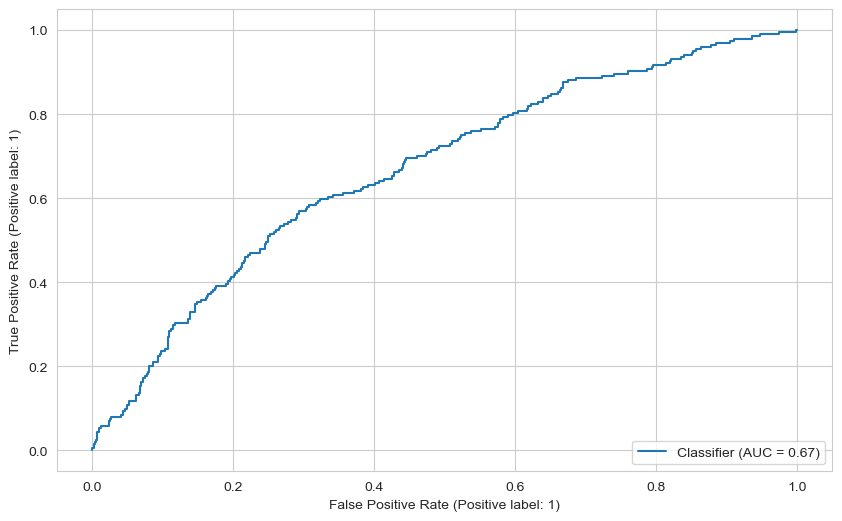

In [75]:
y_pred_proba = model.predict(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred_proba)

## Optuna

In [76]:
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam
import optuna

In [77]:
early_stop = EarlyStopping(
    monitor="val_loss", mode="min", verbose=1, patience=15, restore_best_weights=True
)

In [78]:
trial_metric = "accuracy"
batch_size = 64


def create_model(trial):
    # Some hyperparameters we want to optimize
    n_units1 = trial.suggest_int("n_units1", 8, 128)
    n_units2 = trial.suggest_int("n_units2", 8, 128)
    optimizer = trial.suggest_categorical("optimizer", [Adam, Adadelta, RMSprop, Nadam])
    learning_rate = trial.suggest_loguniform("learning_rate", 1e-5, 1.3e-1)

    tf.random.set_seed(42)
    model = Sequential()
    model.add(Dense(n_units1, input_dim=X_train.shape[1], activation="relu"))
    model.add(Dense(n_units2, activation="relu"))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(
        loss="binary_crossentropy",
        optimizer=optimizer(learning_rate=learning_rate),
        metrics=[trial_metric],
    )
    return model


def objective(trial):
    model = create_model(trial)
    w0 = trial.suggest_loguniform("w0", 0.01, 5)
    w1 = trial.suggest_loguniform("w1", 0.01, 5)
    model.fit(
        X_train,
        y_train,
        validation_data=(X_test, y_test),
        batch_size=batch_size,
        epochs=100,
        callbacks=[early_stop],
        class_weight={0: w0, 1: w1},
        verbose=0,
    )
    score = model.evaluate(X_test, y_test, verbose=0)[1]
    return score

In [79]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=10)
study.best_params

[I 2023-10-30 13:08:17,128] A new study created in memory with name: no-name-43092b54-e8a3-4265-a320-e51935372393


Restoring model weights from the end of the best epoch: 8.
Epoch 23: early stopping


[I 2023-10-30 13:08:23,797] Trial 0 finished with value: 0.49000000953674316 and parameters: {'n_units1': 79, 'n_units2': 18, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>, 'learning_rate': 0.11053679739667004, 'w0': 0.06045624230855161, 'w1': 1.622352388502875}. Best is trial 0 with value: 0.49000000953674316.


Restoring model weights from the end of the best epoch: 19.
Epoch 34: early stopping


[I 2023-10-30 13:08:33,297] Trial 1 finished with value: 0.8510000109672546 and parameters: {'n_units1': 118, 'n_units2': 74, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.005711902325767922, 'w0': 0.05252307962037324, 'w1': 0.011230446540637182}. Best is trial 1 with value: 0.8510000109672546.


Restoring model weights from the end of the best epoch: 19.
Epoch 34: early stopping


[I 2023-10-30 13:08:42,204] Trial 2 finished with value: 0.8550000190734863 and parameters: {'n_units1': 55, 'n_units2': 61, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.03296216816470449, 'w0': 0.2642408757725865, 'w1': 0.0639089587688968}. Best is trial 2 with value: 0.8550000190734863.
[I 2023-10-30 13:09:07,536] Trial 3 finished with value: 0.2409999966621399 and parameters: {'n_units1': 24, 'n_units2': 79, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 1.0023740219057053e-05, 'w0': 1.6617178817694063, 'w1': 2.152581632544425}. Best is trial 2 with value: 0.8550000190734863.


Restoring model weights from the end of the best epoch: 1.
Epoch 16: early stopping


[I 2023-10-30 13:09:13,066] Trial 4 finished with value: 0.7889999747276306 and parameters: {'n_units1': 58, 'n_units2': 77, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 3.0922307075081075e-05, 'w0': 0.16004293499086, 'w1': 0.8343604957619694}. Best is trial 2 with value: 0.8550000190734863.
[I 2023-10-30 13:09:39,066] Trial 5 finished with value: 0.7940000295639038 and parameters: {'n_units1': 109, 'n_units2': 36, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.0001601065479468783, 'w0': 0.6730996712588868, 'w1': 1.8513743717228786}. Best is trial 2 with value: 0.8550000190734863.


Restoring model weights from the end of the best epoch: 23.
Epoch 38: early stopping


[I 2023-10-30 13:09:48,609] Trial 6 finished with value: 0.8289999961853027 and parameters: {'n_units1': 17, 'n_units2': 16, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.01511528041591612, 'w0': 0.7218903768805652, 'w1': 1.9578942834593964}. Best is trial 2 with value: 0.8550000190734863.
[I 2023-10-30 13:10:13,652] Trial 7 finished with value: 0.7960000038146973 and parameters: {'n_units1': 9, 'n_units2': 50, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.0001091632670709338, 'w0': 0.4369084542591736, 'w1': 0.1891545906680887}. Best is trial 2 with value: 0.8550000190734863.


Restoring model weights from the end of the best epoch: 46.
Epoch 61: early stopping


[I 2023-10-30 13:10:29,911] Trial 8 finished with value: 0.8539999723434448 and parameters: {'n_units1': 83, 'n_units2': 92, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>, 'learning_rate': 0.001244897712586331, 'w0': 0.027551226928608355, 'w1': 0.02488542562258227}. Best is trial 2 with value: 0.8550000190734863.


Restoring model weights from the end of the best epoch: 19.
Epoch 34: early stopping


[I 2023-10-30 13:10:40,027] Trial 9 finished with value: 0.8550000190734863 and parameters: {'n_units1': 82, 'n_units2': 33, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.05888937756783147, 'w0': 0.21192808759956722, 'w1': 0.1760056127794798}. Best is trial 2 with value: 0.8550000190734863.


{'n_units1': 55,
 'n_units2': 61,
 'optimizer': keras.src.optimizers.rmsprop.RMSprop,
 'learning_rate': 0.03296216816470449,
 'w0': 0.2642408757725865,
 'w1': 0.0639089587688968}

In [80]:
# build model with optuna parameters
unit1, unit2, optimizer, lr, w0, w1 = (
    study.best_params["n_units1"],
    study.best_params["n_units2"],
    study.best_params["optimizer"],
    study.best_params["learning_rate"],
    study.best_params["w0"],
    study.best_params["w1"],
)
tf.random.set_seed(42)
model = Sequential()
model.add(Dense(unit1, activation="relu"))
model.add(Dense(unit2, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
opt = optimizer(learning_rate=lr)
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Recall"])

# train model
model.fit(
    X_train,
    y_train,
    validation_split=0.1,
    batch_size=512,
    epochs=100,
    callbacks=[early_stop],
    verbose=1,
)

Epoch 1/100
16/16 [==============================] - 1s 16ms/step - loss: 0.6183 - recall: 0.0012 - val_loss: 0.5204 - val_recall: 0.0000e+00
Epoch 2/100
16/16 [==============================] - 0s 4ms/step - loss: 0.4866 - recall: 0.0036 - val_loss: 0.4979 - val_recall: 0.0000e+00
Epoch 3/100
16/16 [==============================] - 0s 4ms/step - loss: 0.4707 - recall: 0.0315 - val_loss: 0.4675 - val_recall: 0.0000e+00
Epoch 4/100
16/16 [==============================] - 0s 4ms/step - loss: 0.4597 - recall: 0.0981 - val_loss: 0.4039 - val_recall: 0.1657
Epoch 5/100
16/16 [==============================] - 0s 4ms/step - loss: 0.4459 - recall: 0.2276 - val_loss: 0.3787 - val_recall: 0.5028
Epoch 6/100
16/16 [==============================] - 0s 4ms/step - loss: 0.4363 - recall: 0.2960 - val_loss: 0.3760 - val_recall: 0.1823
Epoch 7/100
16/16 [==============================] - 0s 4ms/step - loss: 0.4170 - recall: 0.3039 - val_loss: 0.3394 - val_recall: 0.5193
Epoch 8/100
16/16 [=========

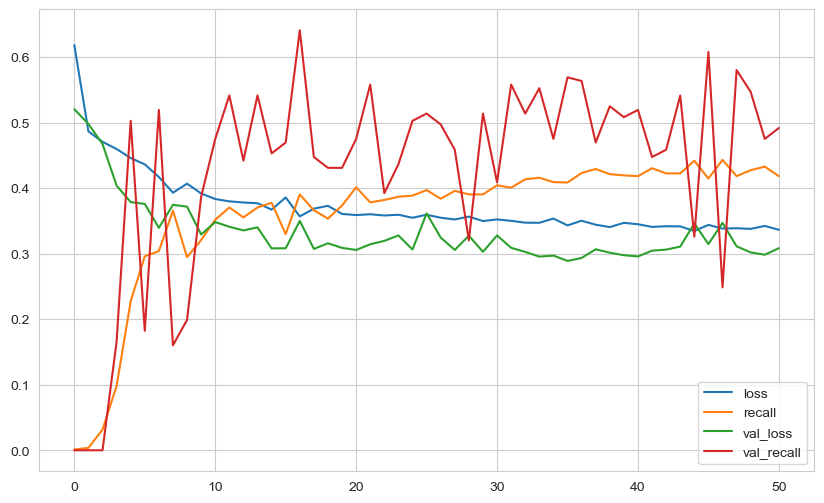

In [81]:
op = pd.DataFrame(model.history.history)
op.plot()
plt.show()

In [82]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[752  44]
 [107  97]]
              precision    recall  f1-score   support

           0       0.88      0.94      0.91       796
           1       0.69      0.48      0.56       204

    accuracy                           0.85      1000
   macro avg       0.78      0.71      0.74      1000
weighted avg       0.84      0.85      0.84      1000



### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

32/32 [==============================] - 0s 2ms/step


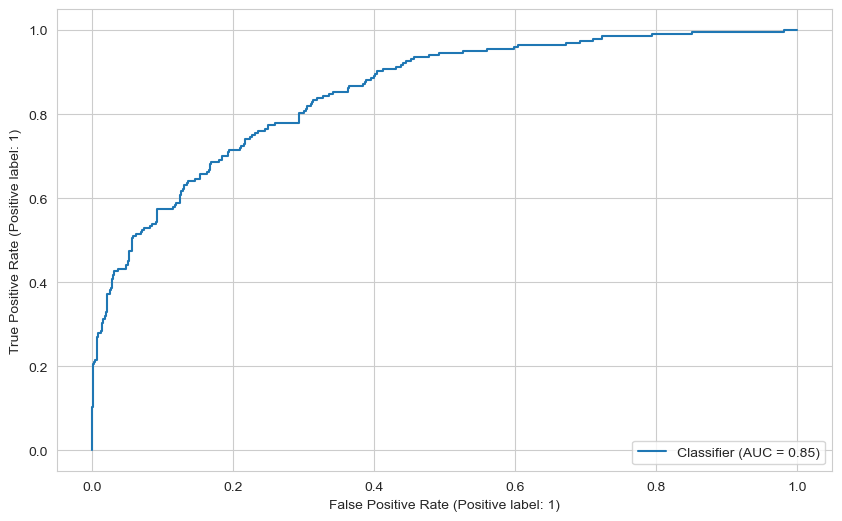

In [83]:
y_pred_proba = model.predict(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred_proba)

In [84]:
model.save("exited.h5")

# Final Model and Model Deployment

In [122]:
from tensorflow.keras.models import load_model
import pickle

In [88]:

pickle.dump(scaler, open("scaler_exited", "wb"))
model_exited = load_model("exited.h5")
scaler_exited = pickle.load(open("scaler_exited", "rb"))

## Prediction

In [136]:
acount = df.drop("Exited", axis=1).iloc[0:1, :]
acount

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.000,1,1,1,101348.880


In [137]:
(model_exited.predict(acount) > 0.5).astype("int32")

1/1 [==============================] - 0s 199ms/step


array([[1]], dtype=int32)

In [138]:
df["Exited"].iloc[0]

1

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___